# <font color='green'>Used Car Price Predictor</font>

**Objective**<br>
    The goal of this model is to predict the price of used car because there is a high demand in the market for used cars but there is no such measure for fair pricing of used cars. For example, if you buy a new car and sell it the next day without any fault, the price of the car is reduced by 20-30%. There this model will help in estimating the fair price of the car based on its intended use.<br><br>
**Steps**<br>
1. Installing packages & Loading dataset
2. Data Cleaning
3. Feature Engineering (Adding derived features)
4. Exploratory Data Analysis & Visualization
6. Feature Engineering (Label Encoding and One Hot Encoding)
7. Preparing the dataset for Machine Learning
8. Training & Evaluating Different Models
9. Predicting Price for test data

### <font color='green'>1. Installing Packages and Loading Dataset</font>

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
## Importing the train dataset
df_train = pd.read_csv('train-data.csv')
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
## Importing the test dataset
df_test = pd.read_csv('test-data.csv')
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


### <font color='green'>2. Data Cleaning</font>

In [6]:
## Merge both train and test data for processing all the features together and then separated them at the end using price feature.
df = df_train.append(df_test)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
## Basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
## Dropping 'Unnamed: 0' column as it is repeated index which is not useful.
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
## Looking at the unique values of Categorical Features.
## All other features are being looked during Feature engineering.

print('Location: ',df['Location'].unique())
print('Fuel_Type: ',df['Fuel_Type'].unique())
print('Transmission: ',df['Transmission'].unique())
print('Owner_Type: ',df['Owner_Type'].unique())

Location:  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type:  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission:  ['Manual' 'Automatic']
Owner_Type:  ['First' 'Second' 'Fourth & Above' 'Third']


In [10]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Dropping NULL values containing rows since they are so few in number in their corresponding column.<br>
In New_Price column many of the cells contain NULL values, so we cannot ignore it.

In [11]:
print("Shape of dataset,")
print("-> Before dropping any Row :",df.shape)
df = df.dropna(subset = ['Mileage','Engine','Power','Seats'])
print("-> After dropping Rows :",df.shape)

Shape of dataset,
-> Before dropping any Row : (7253, 13)
-> After dropping Rows : (7198, 13)


So, after dropping 55 rows, there are now 7198 rows to work on.

In [12]:
## Resetting the dataset index.
df = df.reset_index(drop=True)

### <font color='green'>3. Feautre Engineering (Adding derived features)</font>
`A variety of data could be extracted from the present dataset. That's where Feature Engineering comes in.`
- Add Company/Brand name of car using Name column.
- Add Mileage(km/kg) feature
- Add Engine(CC) feature
- Add Power(bhp) feature
- Add New_Car_Price

In [13]:
## Extracting Company name and numerical value of Mileage, Engine and Power features.
for i in range(df.shape[0]):
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Mileage(km/kg)'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine(CC)'] = df['Engine'][i].split()[0]
    df.at[i, 'Power(bhp)'] = df['Power'][i].split()[0]
    
    if pd.isnull(df.loc[i,'New_Price']) == False:
        df.at[i,'New_Car_Price'] = df['New_Price'][i].split()[0]

In [14]:
## Converting string dtype to float dtype
df['Mileage(km/kg)'] = df['Mileage(km/kg)'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)
df['New_Car_Price'] = df['New_Car_Price'].astype(float)

# df['Power(bhp)'] = df['Power'][i].astype(float)

An error occurred while converting Power(bhp) to float<br>
 `(Can't convert str to float : null)`<br>
 
Then, after looking at the dataset again, I discovered some Power features had a 'null bhp' value.

In [15]:
## Dropping the rows containing Power(bhp) == null
df = df[df['Power(bhp)']!='null']

In [16]:
## Now converting Power(bhp) string values to float dtype
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [17]:
df = df.reset_index(drop=True)
print('Shape of updated training dataset: ', df.shape)

Shape of updated training dataset:  (7073, 18)


In [18]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Car_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80,NaN


In [19]:
## Dropping useless features as they are repeated.
df.drop(['Name','Mileage','Engine','Power','New_Price'], axis=1, inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


### <font color='green'>4. Exploratory Data Analysis & Visualization</font>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7073 non-null   object 
 1   Year               7073 non-null   int64  
 2   Kilometers_Driven  7073 non-null   int64  
 3   Fuel_Type          7073 non-null   object 
 4   Transmission       7073 non-null   object 
 5   Owner_Type         7073 non-null   object 
 6   Seats              7073 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            7073 non-null   object 
 9   Mileage(km/kg)     7073 non-null   float64
 10  Engine(CC)         7073 non-null   float64
 11  Power(bhp)         7073 non-null   float64
 12  New_Car_Price      1005 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 718.5+ KB


In [21]:
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

**Price**<br>
Let's start with a look at our target column.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

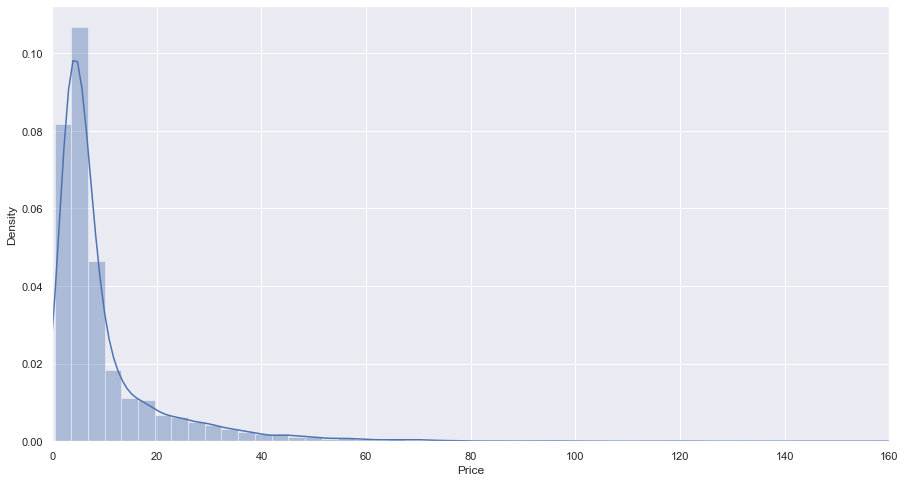

In [22]:
plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

**Fuel Type**

In [23]:
df['Fuel_Type'].describe()

count       7073
unique         4
top       Diesel
freq        3783
Name: Fuel_Type, dtype: object

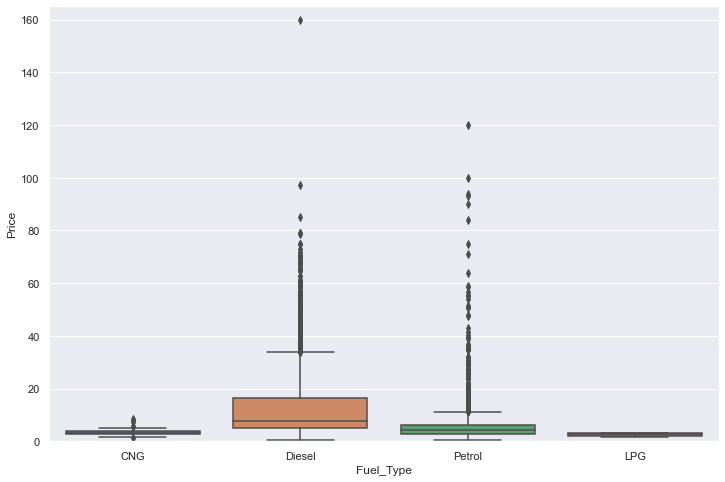

In [24]:
## Creating a new dataframe by concatinating Price and Fule_Type columns
data = pd.concat([df['Price'], df['Fuel_Type']], axis=1)

plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='Fuel_Type', y='Price', data=data)
fig.axis(ymin=0, ymax=165);

As, we can see the price of diesal cars are high, followed by a petrol cars.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

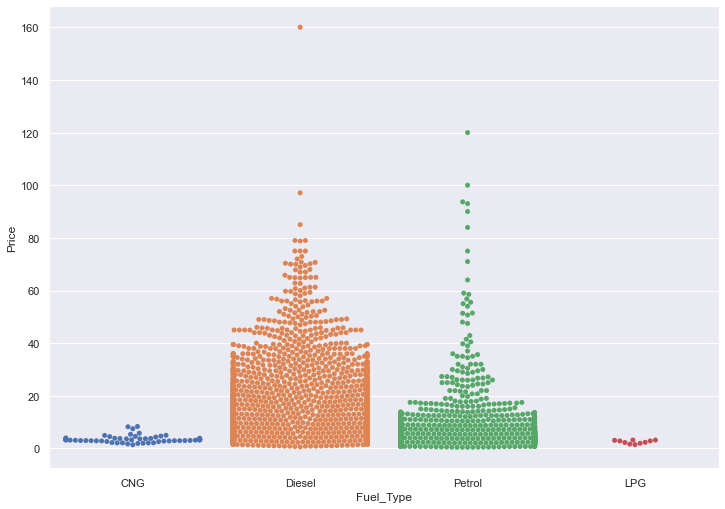

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8.5)
sns.swarmplot(x = 'Fuel_Type', y ='Price', data = df)

**Year**<br>
Let's see how the price of the car varies with its age.

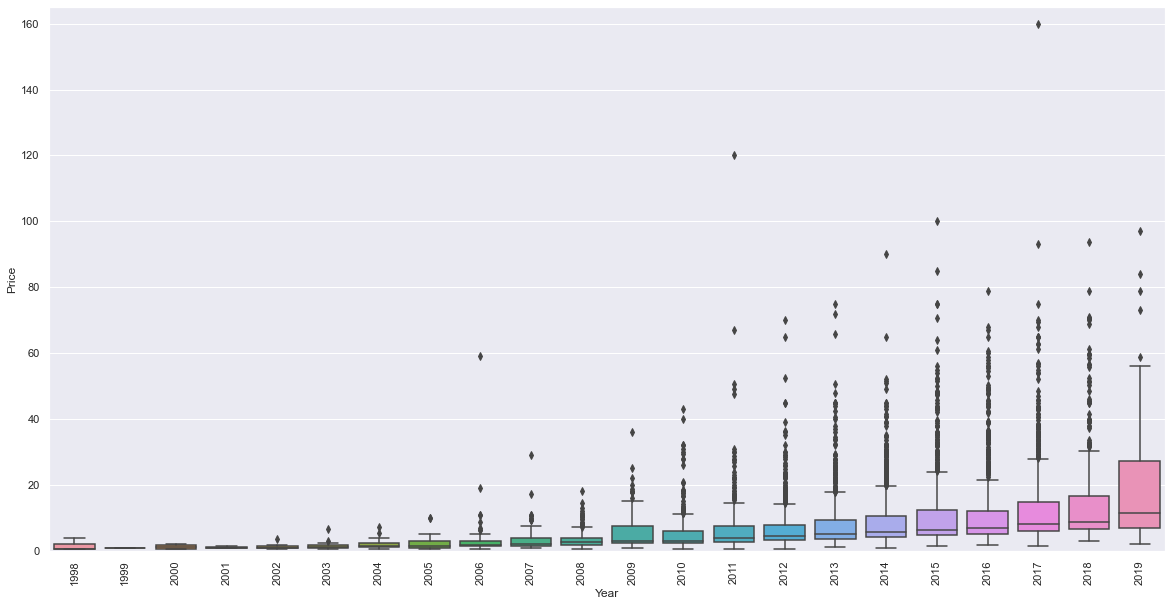

In [26]:
## Creating a new dataframe by concatinating Price and Year columns
data = pd.concat([df['Price'], df['Year']], axis=1)

f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Year', y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

It is an obvious a general trend that the price of the newer cars is higher than the price of the older cars.

**Company**

<Figure size 1440x720 with 0 Axes>

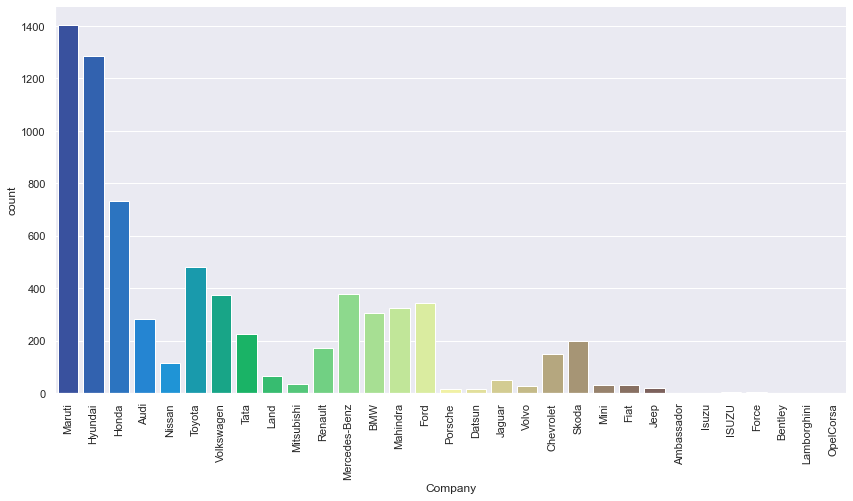

In [27]:
plt.figure(figsize=(20, 10))
sns.catplot(x="Company", kind="count", palette="terrain", height=6, aspect=2, data=df);
plt.xticks(rotation=90);

Maruti is the most popular and widely used car brand, followed by Hyundai and Honda.

**Owner Type**

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

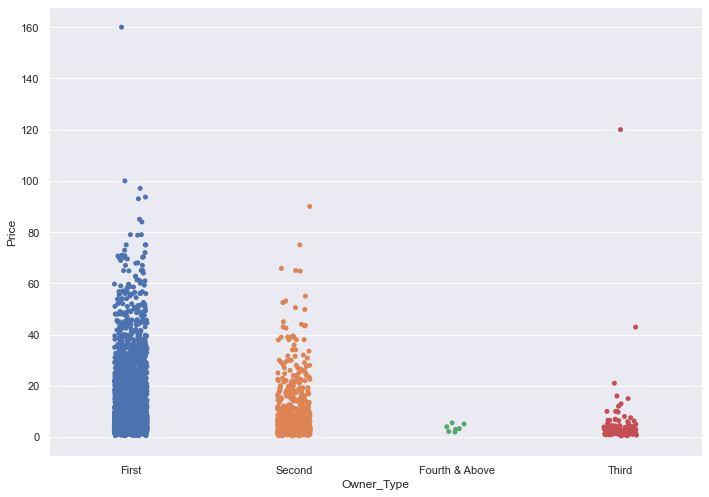

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Owner_Type', y ='Price', data = df) 

It is clear that the majority of cars about 90% are either first hand or second hand cars.<br>
And the price of first-hand cars is higher than that of a second-hand car, which is followed by a third-hand car.

### <font color='green'>5. Feature Engineering</font>

#### Working with Categorical Data
We need to change all categorical columns to numerical columns primarily so that a machine learning algorithm can understand.<br>There are several methods to handle Categorical features, but the two most commonly used techniques are:
1. Label Encoding
2. One-Hot Encoding

One-Hot Encoding is used when the categorical features present in the dataset are not ordinal and when there are fewer categorical features one-hot encoding is very effective. And when the categorical features present in the dataset are in order then there Label Encoding is used.

So, currently we have only 5 categorical features remaining in our dataset:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

In order to determine which encoding to use, plots will be used for each feature.

**Encoding Location**

In [29]:
df['Location'].value_counts()

Mumbai        934
Hyderabad     850
Kochi         764
Coimbatore    762
Pune          734
Delhi         650
Kolkata       633
Chennai       569
Jaipur        484
Bangalore     422
Ahmedabad     271
Name: Location, dtype: int64

We can observe from the above values that Mubmai has the most cars for sale, followed by others.

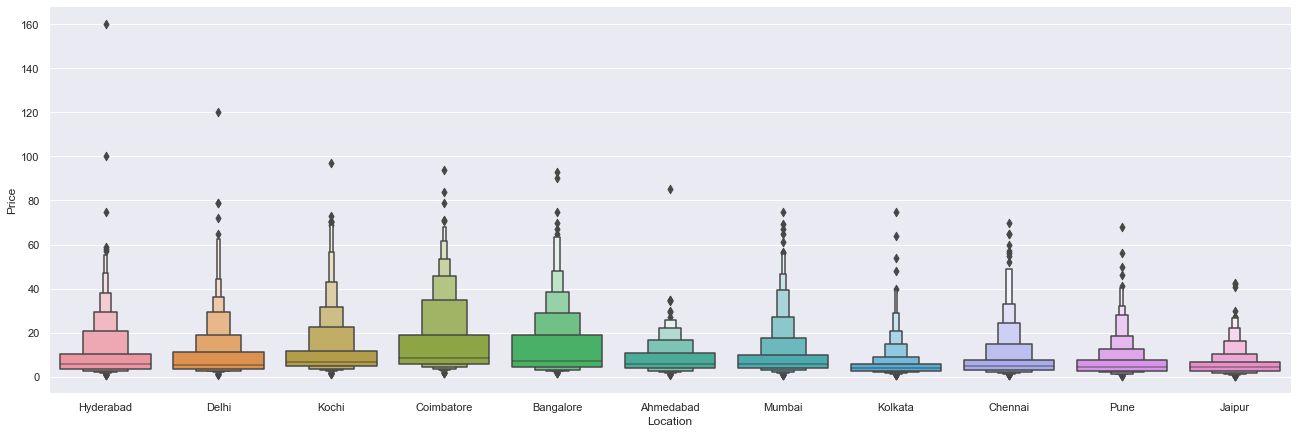

In [30]:
## Price vs Location plot
sns.catplot(y='Price', x='Location', kind="boxen", height=6, aspect=3, data= df.sort_values('Price', ascending=False))

We'll be using One-hot encoding here.

In [31]:
Location = pd.get_dummies(df[['Location']], drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


**Encoding Fuel_Type**

In [32]:
df['Fuel_Type'].value_counts()

Diesel    3783
Petrol    3217
CNG         61
LPG         12
Name: Fuel_Type, dtype: int64

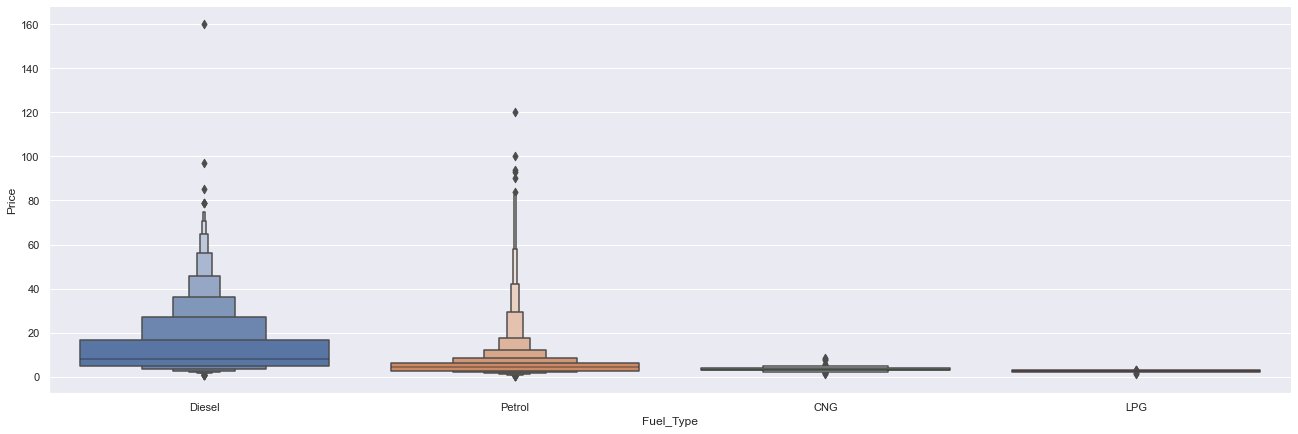

In [33]:
## Price vs Fuel_Type plot
sns.catplot(y='Price', x='Fuel_Type', kind="boxen", height=6, aspect=3, data= df.sort_values('Price', ascending=False))

Here also, we'll be using One-hot encoding.

In [34]:
Fuel_Type = pd.get_dummies(df[['Fuel_Type']],drop_first=True)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


**Encoding Transmission**

In [35]:
df['Transmission'].value_counts()

Manual       5048
Automatic    2025
Name: Transmission, dtype: int64

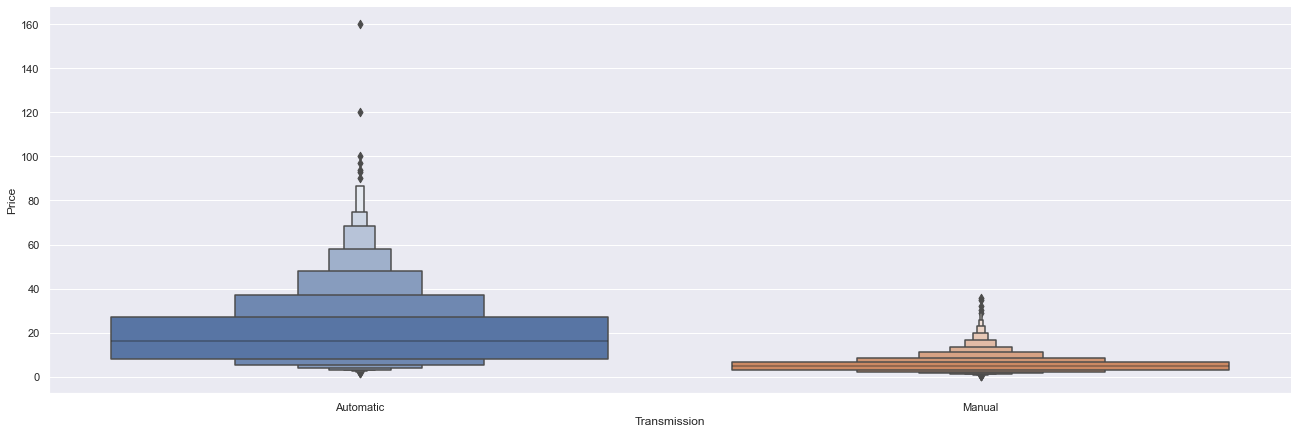

In [36]:
## Price vs Transmission plot
sns.catplot(y='Price', x='Transmission', kind="boxen", height=6, aspect=3, data= df.sort_values('Price', ascending=False))

Here also, we'll be using One-hot encoding.

In [37]:
Transmission = pd.get_dummies(df[['Transmission']], drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


**Encoding Owner_Type**

In [38]:
df['Owner_Type'].value_counts()

First             5840
Second            1100
Third              124
Fourth & Above       9
Name: Owner_Type, dtype: int64

In this case, we are going to use Label Encoding because Owner_Type has ordered data.

In [39]:
df['Owner_Type'] = df['Owner_Type'].map({"First":1,"Second":2,"Third": 3,"Fourth & Above":4})
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_Car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


**Encoding Company**

In [40]:
df['Company'].value_counts()

Maruti           1404
Hyundai          1284
Honda             734
Toyota            481
Mercedes-Benz     378
Volkswagen        373
Ford              342
Mahindra          326
BMW               305
Audi              284
Tata              224
Skoda             200
Renault           170
Chevrolet         150
Nissan            113
Land               64
Jaguar             48
Mitsubishi         36
Fiat               32
Mini               31
Volvo              28
Jeep               19
Datsun             17
Porsche            17
Force               3
ISUZU               3
Isuzu               2
Bentley             2
Ambassador          1
OpelCorsa           1
Lamborghini         1
Name: Company, dtype: int64

<Figure size 1440x720 with 0 Axes>

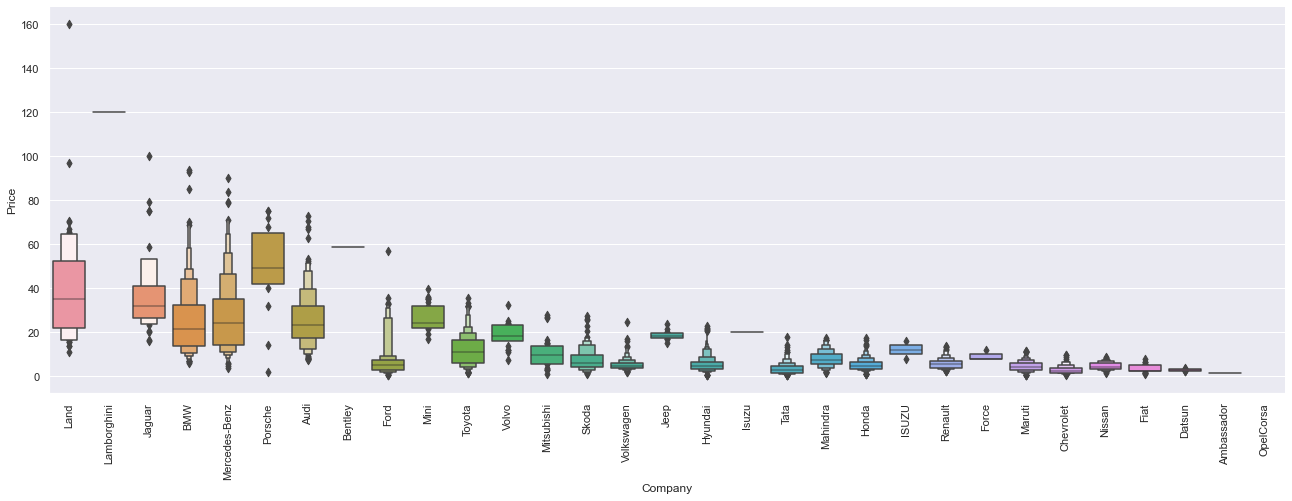

In [41]:
## Price vs Company plot
plt.figure(figsize=(20, 10))
sns.catplot(y='Price', x='Company', kind="boxen", height=6, aspect=3, data= df.sort_values('Price', ascending=False))
plt.xticks(rotation=90);

There is a lot of variation in the price of the car in this company's or brand's feature, so drop them.

In [42]:
df.drop(["Company"], axis=1, inplace=True)

Adding all encoded features ("Company," "Fuel_Type," and "Transmission") to the dataset.<br>
Removing all string type features that have already been encoded by one-hot encoding and label encoding.<br>
Also, the "New_Car_Price" feature is being removed because most of the values are null.

In [43]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1201
Mileage(km/kg)          0
Engine(CC)              0
Power(bhp)              0
New_Car_Price        6068
dtype: int64

In [44]:
df_final= pd.concat([df, Location, Fuel_Type, Transmission], axis=1)
df_final.drop(["Location","Fuel_Type","Transmission","New_Car_Price"], axis=1, inplace=True)
df_final.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7073 non-null   int64  
 1   Kilometers_Driven    7073 non-null   int64  
 2   Owner_Type           7073 non-null   int64  
 3   Seats                7073 non-null   float64
 4   Price                5872 non-null   float64
 5   Mileage(km/kg)       7073 non-null   float64
 6   Engine(CC)           7073 non-null   float64
 7   Power(bhp)           7073 non-null   float64
 8   Location_Bangalore   7073 non-null   uint8  
 9   Location_Chennai     7073 non-null   uint8  
 10  Location_Coimbatore  7073 non-null   uint8  
 11  Location_Delhi       7073 non-null   uint8  
 12  Location_Hyderabad   7073 non-null   uint8  
 13  Location_Jaipur      7073 non-null   uint8  
 14  Location_Kochi       7073 non-null   uint8  
 15  Location_Kolkata     7073 non-null   u

### <font color='green'>6. Preparing the dataset for Machine Learning</font>

In [46]:
final_test = df_final[df_final['Price'].isnull()]
final_train = df_final[~df_final['Price'].isnull()]

In [47]:
final_train

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,1,5.0,4.75,28.40,1248.0,74.00,0,0,...,0,0,0,0,0,0,1,0,0,1
5868,2015,100000,1,5.0,4.00,24.40,1120.0,71.00,0,0,...,0,1,0,0,0,0,1,0,0,1
5869,2012,55000,2,8.0,2.90,14.00,2498.0,112.00,0,0,...,0,1,0,0,0,0,1,0,0,1
5870,2013,46000,1,5.0,2.65,18.90,998.0,67.10,0,0,...,0,0,0,1,0,0,0,0,1,1


In [48]:
final_test.drop(["Price"], axis=1, inplace=True)
final_test

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
5872,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5873,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
5874,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5875,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
5876,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,2011,89411,1,5.0,20.54,1598.0,103.60,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7069,2015,59000,1,5.0,17.21,1197.0,103.60,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7070,2012,28000,1,5.0,23.08,1461.0,63.10,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7071,2013,52262,3,5.0,17.20,1197.0,103.60,0,0,0,...,0,0,0,0,0,1,0,0,1,0


#### Final Features Selection
We only need to look for features on which we need to work since our train and test data are ready.

In [49]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [50]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual']]
X.shape

(5872, 21)

In [51]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


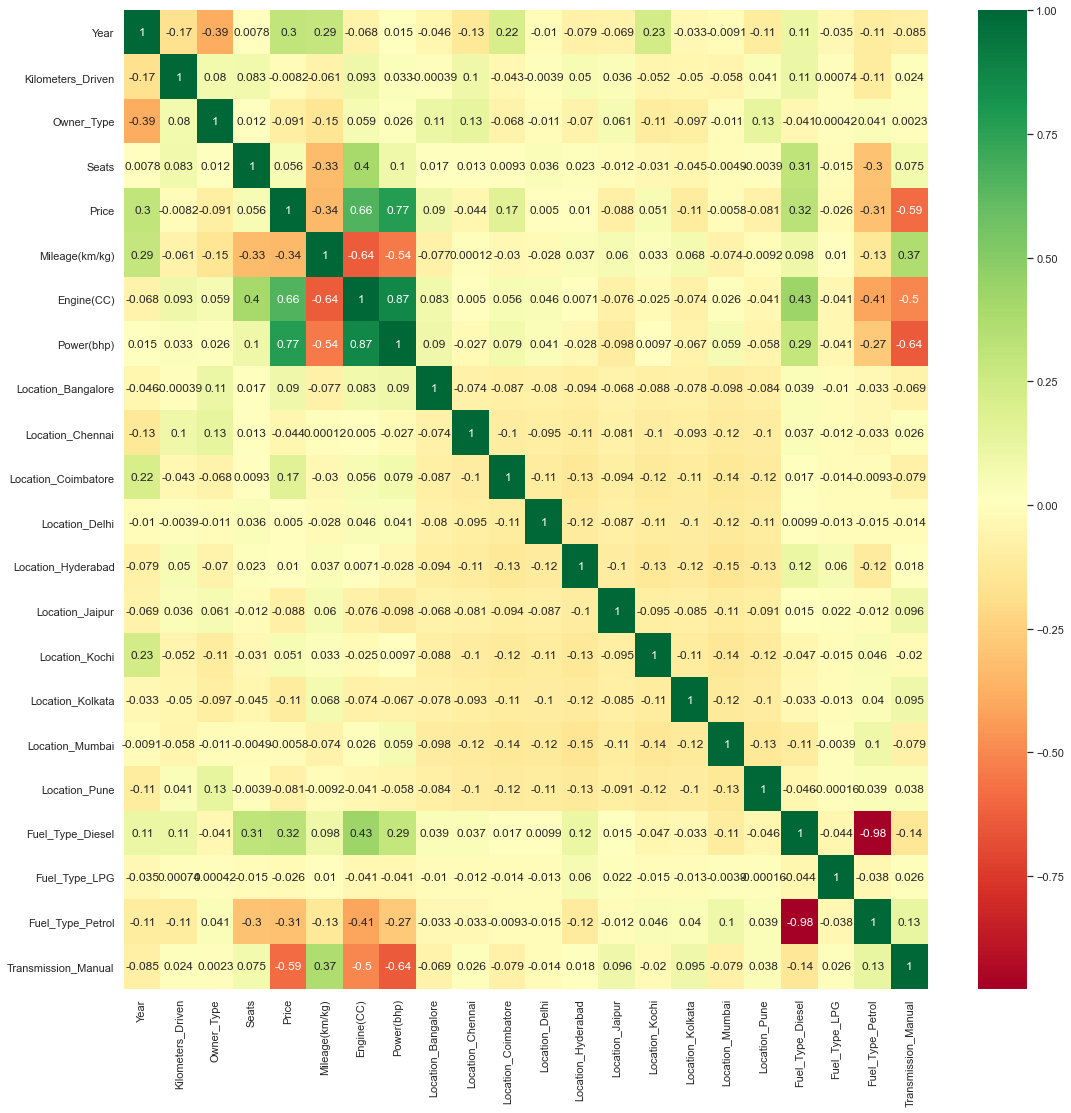

In [52]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-53-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

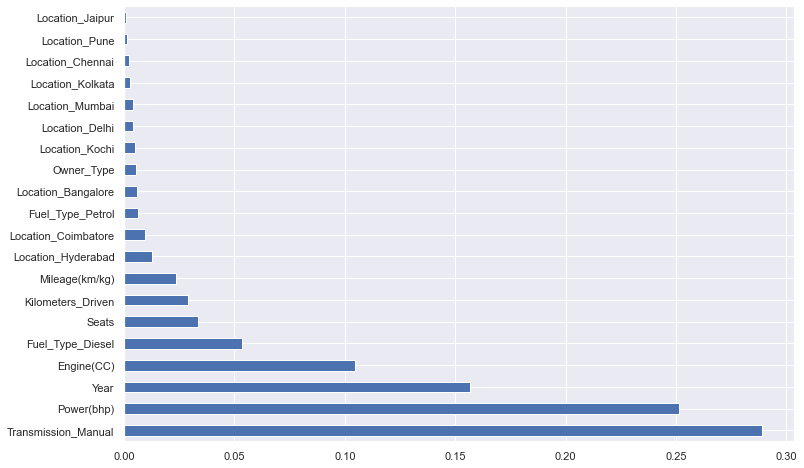

In [54]:
## For better visualisation, created a graph of feature importances.

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### <font color='green'>7. Training & Evaluating Different Models</font>

First we are spliting the data to train and test for the model

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#### 1. Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7083070284244648
Accuracy on Testing set:  0.699101653082699


`Not a good accuracy so, let's try something more better regressor.`

#### 2. Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-57-d4d870abb6b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.9840415931376388
Accuracy on Testing set:  0.9094818742330318




`That's a Great Accuracy`

#### Error Table

In [58]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error      :  1.5063660243161097
Mean Squared  Error      :  10.607857144963647
Root Mean Squared  Error :  3.2569705471440247
R Squared Error          :  0.9094818742330318


One could go even further by Hyperparameter tuning. But, for now I left it  over you all.
 

### <font color='green'>8. Predicting Price for Test data</font>

In [59]:
test_pred = rf_reg.predict(final_test)

In [60]:
final_test.loc[:,['Price']] = test_pred
final_test

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
5872,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,1,3.179600
5873,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,1,1,3.134600
5874,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,1,0,1,0,0,1,17.778700
5875,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,1,0,0,0,1,1,4.547600
5876,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,1,0,0,1,12.564800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,2011,89411,1,5.0,20.54,1598.0,103.60,0,0,0,...,0,0,0,0,0,1,0,0,1,3.957400
7069,2015,59000,1,5.0,17.21,1197.0,103.60,0,0,0,...,0,0,0,1,0,0,0,1,0,6.279900
7070,2012,28000,1,5.0,23.08,1461.0,63.10,0,0,0,...,0,0,1,0,0,1,0,0,1,3.185200
7071,2013,52262,3,5.0,17.20,1197.0,103.60,0,0,0,...,0,0,0,0,1,0,0,1,0,4.157000
